In [143]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jayjoshi37/digital-payment-fraud-detection")

print("Path to dataset files:", path)

Path to dataset files: /Users/shubham/.cache/kagglehub/datasets/jayjoshi37/digital-payment-fraud-detection/versions/1


# Imports

In [144]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Data

In [145]:
files = os.listdir(path)
csv_file = [f for f in files if f.endswith('.csv')][0]
full_path = os.path.join(path, csv_file)

In [146]:
data = pd.read_csv(full_path)
data.head()

,transaction_id,user_id,transaction_amount,transaction_type,payment_mode,device_type,device_location,account_age_days,transaction_hour,previous_failed_attempts,avg_transaction_amount,is_international,ip_risk_score,login_attempts_last_24h,fraud_label
0,T1,U3756,18758.28,Transfer,UPI,Web,Hyderabad,895,14,1,25535.84,0,0.718,4,0
1,T2,U7899,47538.18,Payment,Wallet,iOS,Hyderabad,918,21,0,3955.85,0,0.525,9,0
2,T3,U1765,36613.10,Payment,Card,Android,Chennai,1506,8,4,22727.71,0,0.985,9,0
3,T4,U8850,29952.99,Payment,Wallet,iOS,Chennai,800,1,3,18095.89,0,0.797,2,0
4,T5,U9049,7843.13,Payment,UPI,Web,Delhi,301,4,1,9317.49,1,0.468,1,0


In [147]:
data_fraud_only = data[data['fraud_label'] == 1]
data_fraud_only.head()

,transaction_id,user_id,transaction_amount,transaction_type,payment_mode,device_type,device_location,account_age_days,transaction_hour,previous_failed_attempts,avg_transaction_amount,is_international,ip_risk_score,login_attempts_last_24h,fraud_label
6,T7,U8763,2951.28,Transfer,UPI,Android,Hyderabad,1285,22,4,11451.45,0,0.045,8,1
103,T104,U1616,25453.11,Payment,UPI,iOS,Bangalore,1610,13,2,27397.73,0,0.783,5,1
122,T123,U2161,15934.27,Payment,UPI,Android,Delhi,995,4,0,24567.15,0,0.582,3,1
136,T137,U2686,25963.59,Transfer,Wallet,Android,Chennai,1295,17,4,18730.85,0,0.819,6,1
146,T147,U6324,30497.74,Transfer,Wallet,Web,Hyderabad,1811,11,3,419.95,0,0.333,9,1


In [148]:
data.columns

Index(['transaction_id', 'user_id', 'transaction_amount', 'transaction_type',
       'payment_mode', 'device_type', 'device_location', 'account_age_days',
       'transaction_hour', 'previous_failed_attempts',
       'avg_transaction_amount', 'is_international', 'ip_risk_score',
       'login_attempts_last_24h', 'fraud_label'],
      dtype='str')

In [149]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_id            7500 non-null   str    
 1   user_id                   7500 non-null   str    
 2   transaction_amount        7500 non-null   float64
 3   transaction_type          7500 non-null   str    
 4   payment_mode              7500 non-null   str    
 5   device_type               7500 non-null   str    
 6   device_location           7500 non-null   str    
 7   account_age_days          7500 non-null   int64  
 8   transaction_hour          7500 non-null   int64  
 9   previous_failed_attempts  7500 non-null   int64  
 10  avg_transaction_amount    7500 non-null   float64
 11  is_international          7500 non-null   int64  
 12  ip_risk_score             7500 non-null   float64
 13  login_attempts_last_24h   7500 non-null   int64  
 14  fraud_label        

# EDA

In [150]:
data.describe()

,transaction_amount,account_age_days,transaction_hour,previous_failed_attempts,avg_transaction_amount,is_international,ip_risk_score,login_attempts_last_24h,fraud_label
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,24813.534161,1006.904533,11.435867,2.013600,15129.061027,0.100667,0.505026,4.995067,0.065200
std,14434.742371,575.632925,6.950899,1.421578,8597.760720,0.300907,0.289647,2.593879,0.246895
min,50.580000,10.000000,0.000000,0.000000,102.790000,0.000000,0.000000,1.000000,0.000000
25%,12272.785000,502.750000,5.000000,1.000000,7725.842500,0.000000,0.257000,3.000000,0.000000
50%,24715.550000,1018.000000,11.000000,2.000000,15074.810000,0.000000,0.502000,5.000000,0.000000
75%,37288.375000,1505.000000,18.000000,3.000000,22573.062500,0.000000,0.759000,7.000000,0.000000
max,49985.900000,1999.000000,23.000000,4.000000,29994.290000,1.000000,1.000000,9.000000,1.000000


In [151]:
data_fraud_only.describe()

,transaction_amount,account_age_days,transaction_hour,previous_failed_attempts,avg_transaction_amount,is_international,ip_risk_score,login_attempts_last_24h,fraud_label
count,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.0
mean,24256.210879,1071.456033,11.568507,2.096115,15310.463313,0.083845,0.508689,5.155419,1.0
std,14289.574936,566.853237,6.873261,1.418902,8702.706731,0.277438,0.301381,2.557610,0.0
min,245.720000,10.000000,0.000000,0.000000,392.350000,0.000000,0.000000,1.000000,1.0
25%,11770.370000,564.000000,6.000000,1.000000,7576.580000,0.000000,0.245000,3.000000,1.0
50%,24260.580000,1108.000000,12.000000,2.000000,15421.840000,0.000000,0.485000,5.000000,1.0
75%,35936.770000,1566.000000,18.000000,3.000000,22738.260000,0.000000,0.790000,7.000000,1.0
max,49985.900000,1996.000000,23.000000,4.000000,29826.310000,1.000000,0.995000,9.000000,1.0


In [152]:
data.isna().any()

transaction_id              False
user_id                     False
transaction_amount          False
transaction_type            False
payment_mode                False
device_type                 False
device_location             False
account_age_days            False
transaction_hour            False
previous_failed_attempts    False
avg_transaction_amount      False
is_international            False
ip_risk_score               False
login_attempts_last_24h     False
fraud_label                 False
dtype: bool

# Plots

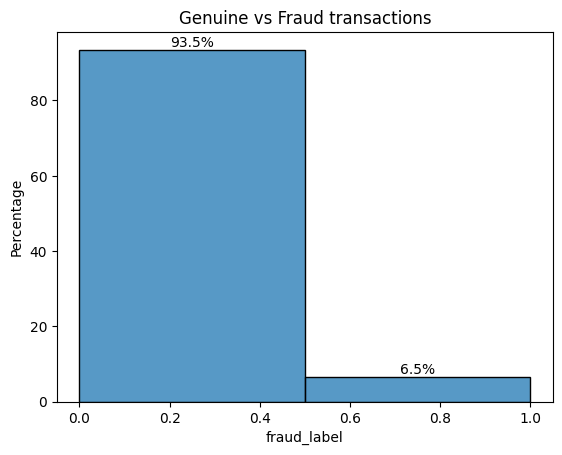

In [153]:

plt.title('Genuine vs Fraud transactions')
ax = sns.histplot(data['fraud_label'], bins=2, stat="percent")

# Add percentage labels on each bar
for p in ax.patches:
    percentage = p.get_height()
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2, percentage),
                ha='center', va='bottom')

plt.ylabel("Percentage")
plt.show()

There are very low rate of fraud cases (below < 10%) 

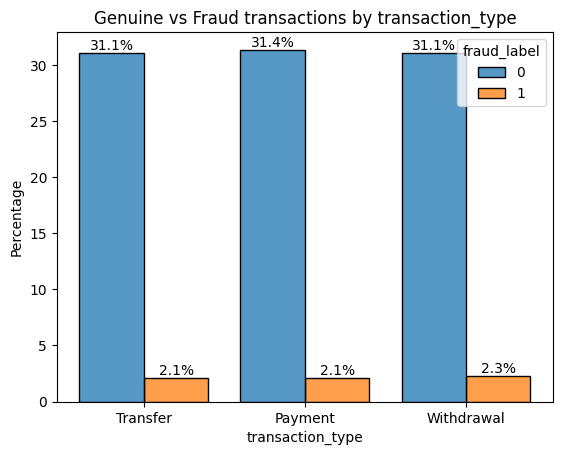

In [154]:

plt.title('Genuine vs Fraud transactions by transaction_type')
ax = sns.histplot(x = 'transaction_type', bins=2, stat="percent",hue= 'fraud_label',data=data,multiple="dodge",shrink=0.8 )

# Add percentage labels on each bar
for p in ax.patches:
    percentage = p.get_height()
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2, percentage),
                ha='center', va='bottom')

plt.ylabel("Percentage")
plt.show()

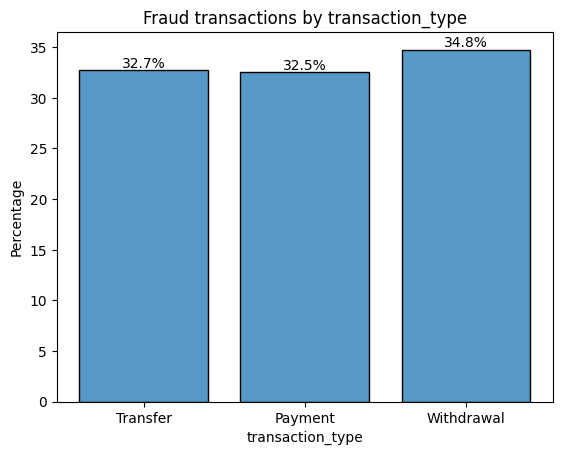

In [155]:
plt.title('Fraud transactions by transaction_type')

ax = sns.histplot(x = 'transaction_type', stat="percent",
                  data=data_fraud_only,multiple="dodge",shrink=0.8 )

# Add percentage labels on each bar
for p in ax.patches:
    percentage = p.get_height()
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2, percentage),
                ha='center', va='bottom')

plt.ylabel("Percentage")
plt.show()

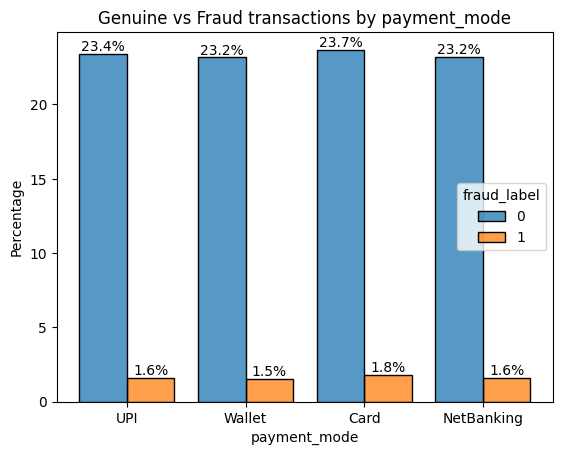

In [156]:
plt.title('Genuine vs Fraud transactions by payment_mode')

ax = sns.histplot(x = 'payment_mode',  stat="percent",hue= 'fraud_label',data=data,multiple="dodge",shrink=0.8 )

# Add percentage labels on each bar
for p in ax.patches:
    percentage = p.get_height()
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2, percentage),
                ha='center', va='bottom')

plt.ylabel("Percentage")
plt.show()

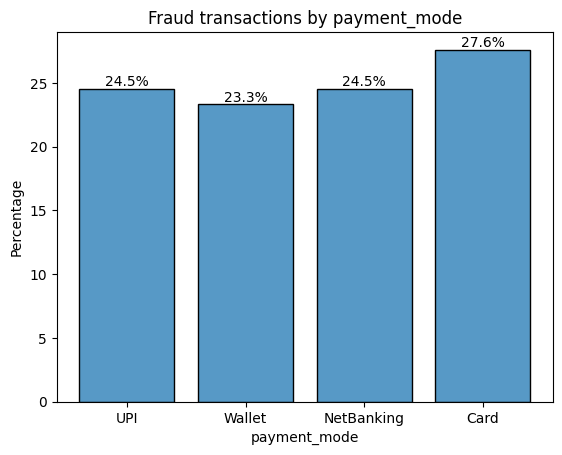

In [157]:
plt.title('Fraud transactions by payment_mode')

ax = sns.histplot(x = 'payment_mode',  stat="percent",data=data_fraud_only,shrink=0.8 )

# Add percentage labels on each bar
for p in ax.patches:
    percentage = p.get_height()
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2, percentage),
                ha='center', va='bottom')

plt.ylabel("Percentage")
plt.show()

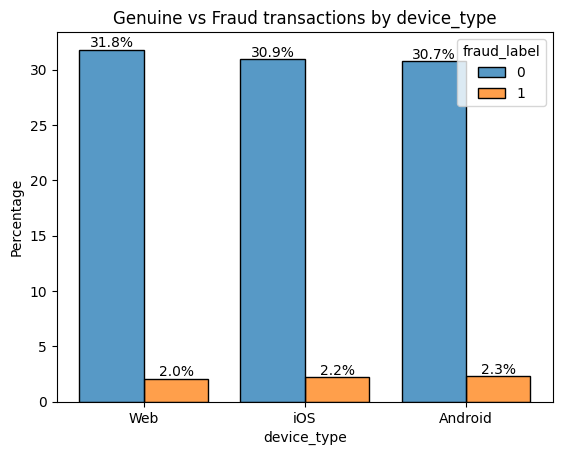

In [158]:
plt.title('Genuine vs Fraud transactions by device_type')


ax = sns.histplot(x = 'device_type',  stat="percent",hue= 'fraud_label',data=data,multiple="dodge",shrink=0.8 )

# Add percentage labels on each bar
for p in ax.patches:
    percentage = p.get_height()
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2, percentage),
                ha='center', va='bottom')

plt.ylabel("Percentage")
plt.show()

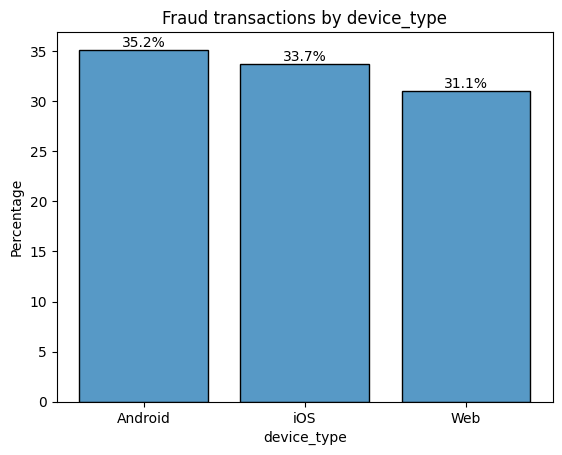

In [159]:
plt.title('Fraud transactions by device_type')


ax = sns.histplot(x = 'device_type',  stat="percent",data=data_fraud_only,shrink=0.8 )

# Add percentage labels on each bar
for p in ax.patches:
    percentage = p.get_height()
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2, percentage),
                ha='center', va='bottom')

plt.ylabel("Percentage")
plt.show()

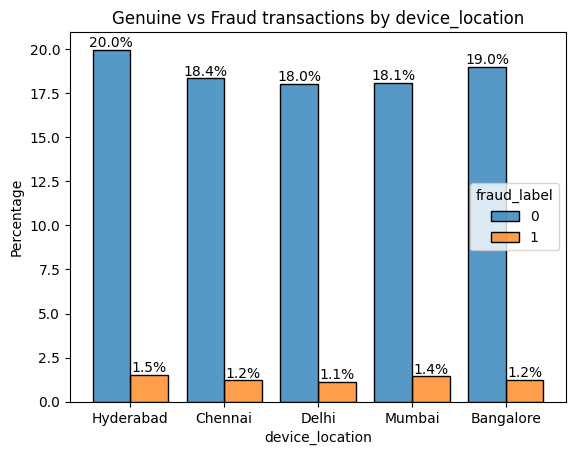

In [160]:

plt.title('Genuine vs Fraud transactions by device_location')


ax = sns.histplot(x = 'device_location', stat="percent",hue= 'fraud_label',data=data,multiple="dodge",shrink=0.8 )

# Add percentage labels on each bar
for p in ax.patches:
    percentage = p.get_height()
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2, percentage),
                ha='center', va='bottom')

plt.ylabel("Percentage")
plt.show()

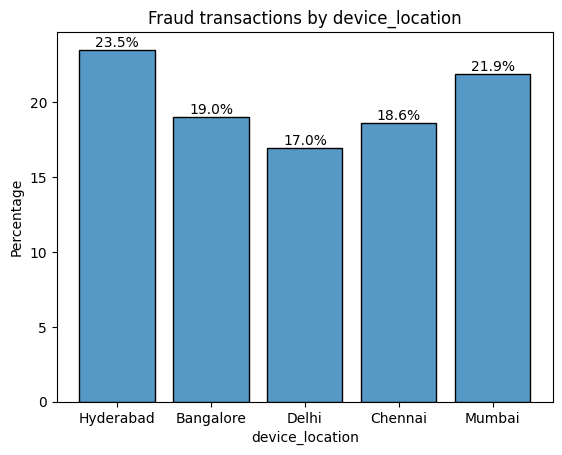

In [161]:

plt.title('Fraud transactions by device_location')


ax = sns.histplot(x = 'device_location', stat="percent",data=data_fraud_only,multiple="dodge",shrink=0.8 )

# Add percentage labels on each bar
for p in ax.patches:
    percentage = p.get_height()
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2, percentage),
                ha='center', va='bottom')

plt.ylabel("Percentage")
plt.show()

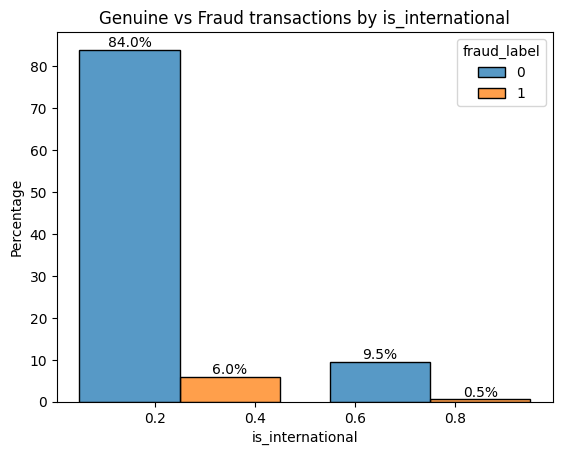

In [162]:


plt.title('Genuine vs Fraud transactions by is_international')

ax = sns.histplot(x = 'is_international',bins=2, stat="percent",hue= 'fraud_label',data=data,multiple="dodge",shrink=0.8 )

# Add percentage labels on each bar
for p in ax.patches:
    percentage = p.get_height()
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2, percentage),
                ha='center', va='bottom')

plt.ylabel("Percentage")
plt.show()

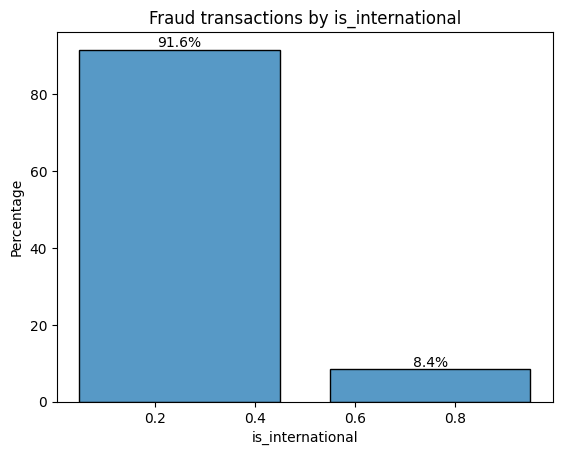

In [163]:


plt.title('Fraud transactions by is_international')

ax = sns.histplot(x = 'is_international',bins=2, stat="percent",data=data_fraud_only,multiple="dodge",shrink=0.8 )

# Add percentage labels on each bar
for p in ax.patches:
    percentage = p.get_height()
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2, percentage),
                ha='center', va='bottom')

plt.ylabel("Percentage")
plt.show()

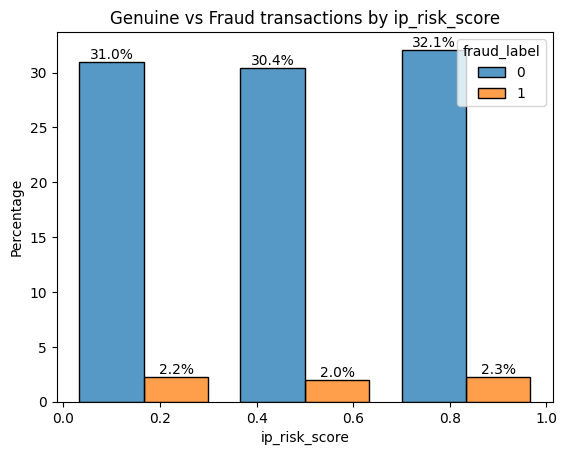

In [164]:

plt.title('Genuine vs Fraud transactions by ip_risk_score')


ax = sns.histplot(x = 'ip_risk_score',bins=3, stat="percent",hue= 'fraud_label',data=data,multiple="dodge",shrink=0.8 )

# Add percentage labels on each bar
for p in ax.patches:
    percentage = p.get_height()
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2, percentage),
                ha='center', va='bottom')

plt.ylabel("Percentage")
plt.show()

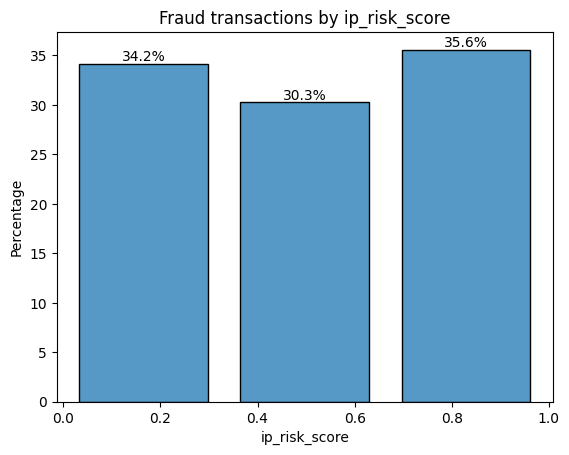

In [165]:

plt.title('Fraud transactions by ip_risk_score')


ax = sns.histplot(x = 'ip_risk_score',bins=3, stat="percent",data=data_fraud_only,multiple="dodge",shrink=0.8 )

# Add percentage labels on each bar
for p in ax.patches:
    percentage = p.get_height()
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2, percentage),
                ha='center', va='bottom')

plt.ylabel("Percentage")
plt.show()

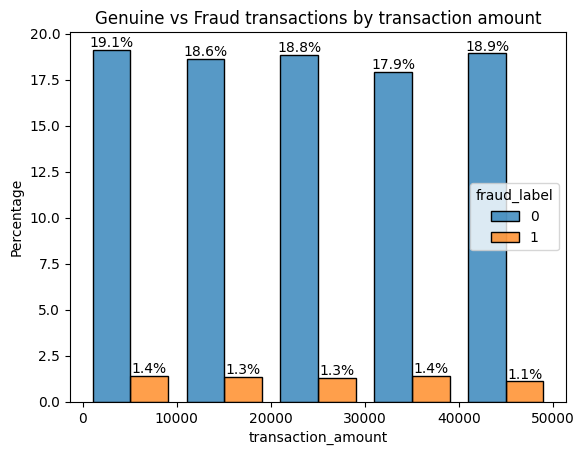

In [166]:

plt.title('Genuine vs Fraud transactions by transaction amount')


ax = sns.histplot(x = 'transaction_amount',bins=5,hue = 'fraud_label' ,stat="percent",data=data,multiple="dodge",shrink=0.8 )

# Add percentage labels on each bar
for p in ax.patches:
    percentage = p.get_height()
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2, percentage),
                ha='center', va='bottom')

plt.ylabel("Percentage")
plt.show()

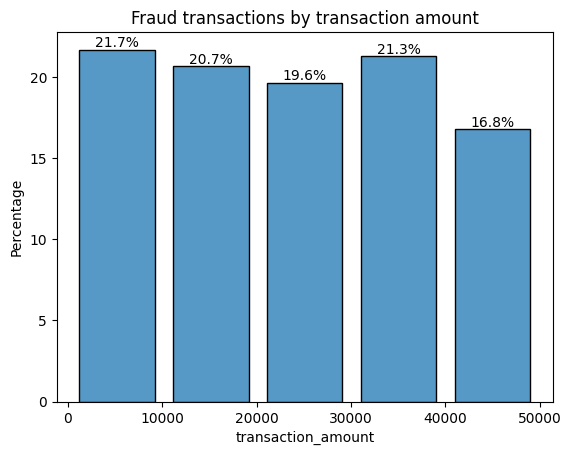

In [167]:

plt.title('Fraud transactions by transaction amount')


ax = sns.histplot(x = 'transaction_amount',bins=5 ,stat="percent",data=data_fraud_only,multiple="dodge",shrink=0.8 )

# Add percentage labels on each bar
for p in ax.patches:
    percentage = p.get_height()
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2, percentage),
                ha='center', va='bottom')

plt.ylabel("Percentage")
plt.show()

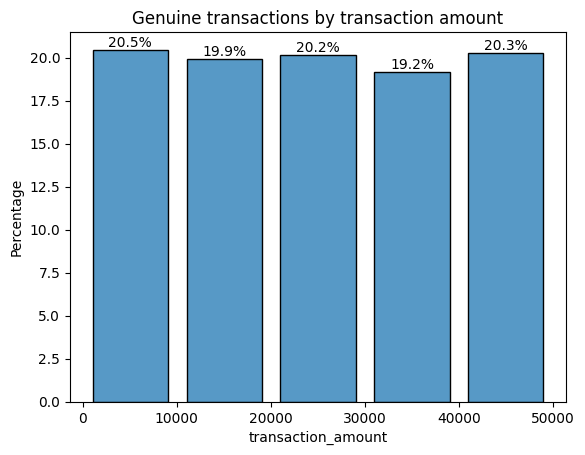

In [168]:

plt.title('Genuine transactions by transaction amount')


ax = sns.histplot(x = 'transaction_amount',bins=5 ,stat="percent",data=data[data['fraud_label'] == 0],multiple="dodge",shrink=0.8 )

# Add percentage labels on each bar
for p in ax.patches:
    percentage = p.get_height()
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2, percentage),
                ha='center', va='bottom')

plt.ylabel("Percentage")
plt.show()

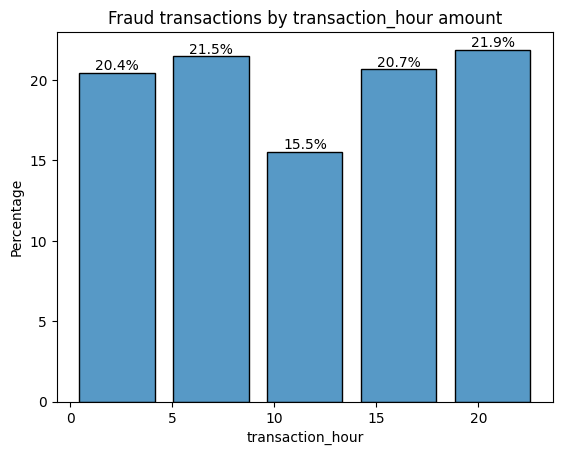

In [169]:

plt.title('Fraud transactions by transaction_hour amount')


ax = sns.histplot(x = 'transaction_hour',bins=5 ,stat="percent",data=data_fraud_only,multiple="dodge",shrink=0.8 )

# Add percentage labels on each bar
for p in ax.patches:
    percentage = p.get_height()
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2, percentage),
                ha='center', va='bottom')

plt.ylabel("Percentage")
plt.show()

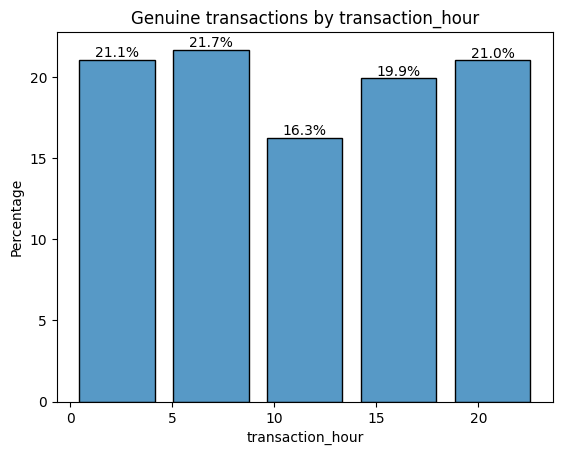

In [170]:

plt.title('Genuine transactions by transaction_hour')


ax = sns.histplot(x = 'transaction_hour',bins=5 ,stat="percent",data=data[data['fraud_label'] == 0],multiple="dodge",shrink=0.8 )

# Add percentage labels on each bar
for p in ax.patches:
    percentage = p.get_height()
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2, percentage),
                ha='center', va='bottom')

plt.ylabel("Percentage")
plt.show()

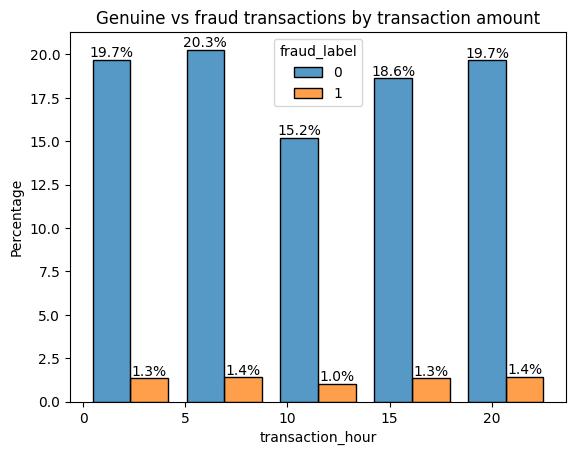

In [171]:

plt.title('Genuine vs fraud transactions by transaction amount')


ax = sns.histplot(x = 'transaction_hour',bins=5 ,hue= 'fraud_label',stat="percent",data=data,multiple="dodge",shrink=0.8 )

# Add percentage labels on each bar
for p in ax.patches:
    percentage = p.get_height()
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2, percentage),
                ha='center', va='bottom')

plt.ylabel("Percentage")
plt.show()

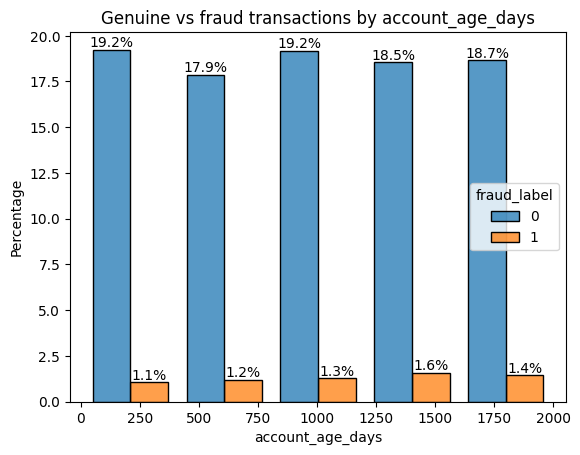

In [172]:

plt.title('Genuine vs fraud transactions by account_age_days')


ax = sns.histplot(x = 'account_age_days',bins=5 ,hue= 'fraud_label',stat="percent",data=data,multiple="dodge",shrink=0.8 )

# Add percentage labels on each bar
for p in ax.patches:
    percentage = p.get_height()
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2, percentage),
                ha='center', va='bottom')

plt.ylabel("Percentage")
plt.show()

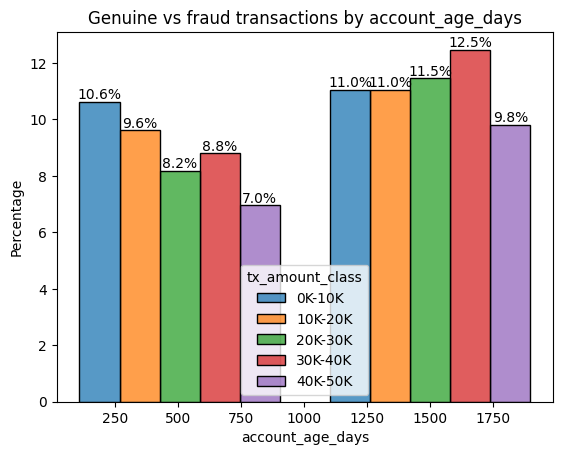

In [173]:

plt.title('Genuine vs fraud transactions by account_age_days')

max_val = data_fraud_only['transaction_amount'].max()
bins = np.arange(0, max_val + 10000, 10000)

labels = [f'{int(b/1000)}K-{int((b+10000)/1000)}K' for b in bins[:-1]]

data_fraud_only['tx_amount_class'] = pd.cut(
    data_fraud_only['transaction_amount'],
    bins=bins,
    labels=labels,
    right=False
)
ax = sns.histplot(x = 'account_age_days',bins=2 ,hue= 'tx_amount_class',stat="percent",data=data_fraud_only,multiple="dodge",shrink=0.8 )

# Add percentage labels on each bar
for p in ax.patches:
    percentage = p.get_height()
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2, percentage),
                ha='center', va='bottom')

plt.ylabel("Percentage")
plt.show()

# Take away from the EDA
1. Data is highly imbalanced
2. Most of the frauds happens with Withdrawal type of transactions
3. Card is the riskiest mode and wallet is the safest
4. Android has reported more number of frauds
5. Hyderbad has the highest fraud reported
6. most of the fraud incident happens after 20th hour
7. amount below 10,000 has the high fraud rate but if the account age is > 1550 days then the amount of 30,000-40,000 is at high risk.

# Machine Learning

Selection of a Model
- logistic regression poorly handles imbalanced data
- Decision Tree has problemm of overfitting and data memorisation it is too risky if the data is embalanced
- Random forrest is a better option, due to it's strong baseline and ability of reduce the data memorisation
- Xgboost/ LightGBM handels the imbalanced data very well with a good amount of accuracy lightGBM is fast but the XGboost is best for draud detection
- Why XGboost over Random forrest ? : Xgboost is ideal with imbalanced data and fraud detection also in random forest the Trees are parallerly created but in XGboost it is sequentially so the issue with the previous tree coukd be rectified in next tree.

In [174]:
categorical_columns = [
    "transaction_type",
    "payment_mode",
    "device_type",
    "device_location"
]


data = data.drop(columns=['transaction_id', 'user_id'])
data = pd.get_dummies(data,drop_first=True)

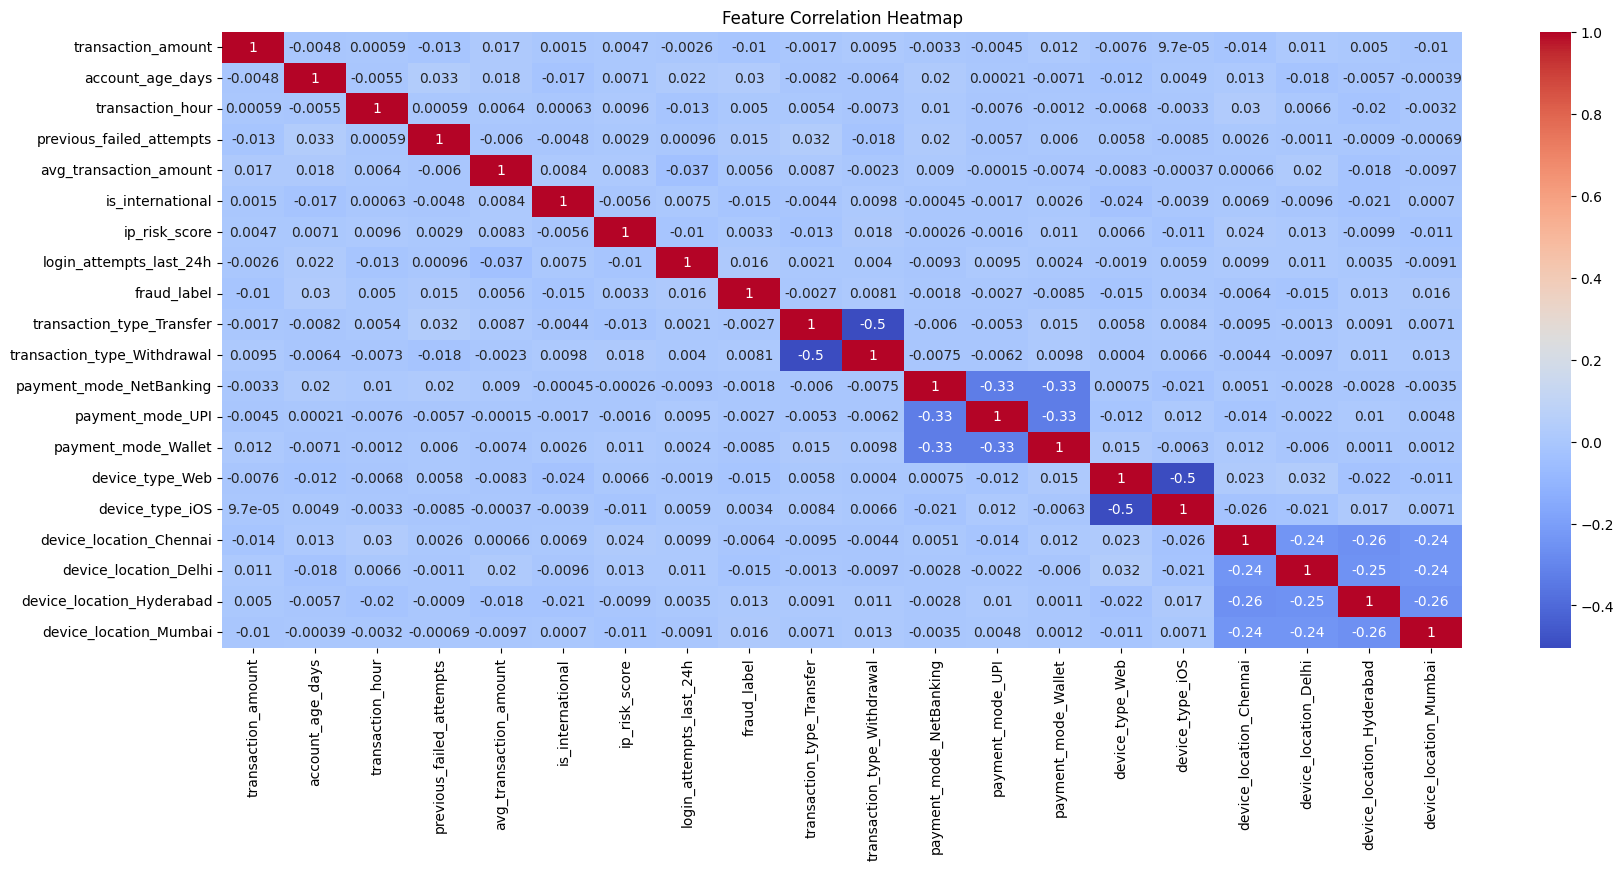

In [175]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# ML Imports

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score,f1_score,precision_score,recall_score,confusion_matrix,accuracy_score, RocCurveDisplay
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from xgboost import XGBClassifier

Split Data Set

In [177]:
X = data.drop('fraud_label', axis=1)
y = data['fraud_label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#stratified method is useful in critical imbalanced data

In [178]:
baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train, y_train)

/Users/shubham/Desktop/ML_REPO/.venv/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [179]:
y_pred = baseline_model.predict(X_test)
accuracy_score(y_test.values,y_pred)

0.9346666666666666

In [180]:
cm = confusion_matrix(y_test, y_pred)

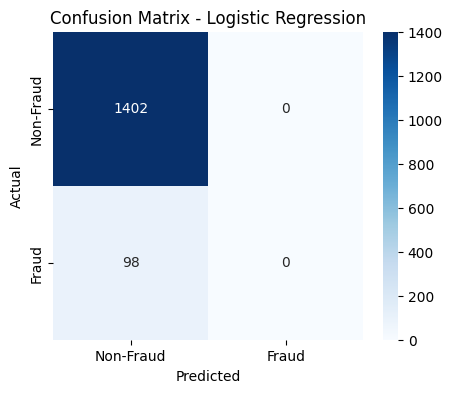

In [181]:
# Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [182]:
recall_score(y_test,y_pred),precision_score(y_test,y_pred)

/Users/shubham/Desktop/ML_REPO/.venv/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


(0.0, 0.0)

Classification Report:

              precision    recall  f1-score   support

           0       0.93      1.00      0.97      1402
           1       0.00      0.00      0.00        98

    accuracy                           0.93      1500
   macro avg       0.47      0.50      0.48      1500
weighted avg       0.87      0.93      0.90      1500

ROC-AUC Score: 0.4975


/Users/shubham/Desktop/ML_REPO/.venv/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/shubham/Desktop/ML_REPO/.venv/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/shubham/Desktop/ML_REPO/.venv/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{me

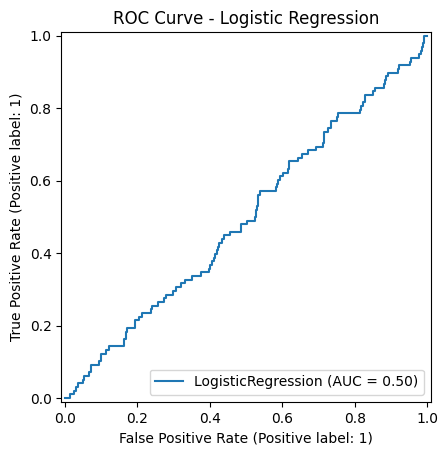

In [183]:
y_prob = baseline_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC
# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC Curve
RocCurveDisplay.from_estimator(baseline_model, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()

# Logistic Regression Outcomes:
- Model accuracy is high 93%
- by the confusion matrix is clear that 
    - model is able to classify the non-fraud transactions
    - model is classifying fraud transactions as non-fraud which is a risky situation
    - in short the model is generalising the output by non fraud
    - classification reports verifies it.



# Let's try to balance the data and try

In [184]:
# SMOTE - Synthetic Minority Over-sampling Technique

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [185]:
baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train_smote, y_train_smote)

/Users/shubham/Desktop/ML_REPO/.venv/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [186]:
y_pred = baseline_model.predict(X_test)
accuracy_score(y_test.values,y_pred)

0.7533333333333333

In [187]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")


Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.79      0.86      1402
           1       0.06      0.17      0.08        98

    accuracy                           0.75      1500
   macro avg       0.49      0.48      0.47      1500
weighted avg       0.87      0.75      0.81      1500

ROC-AUC Score: 0.4975


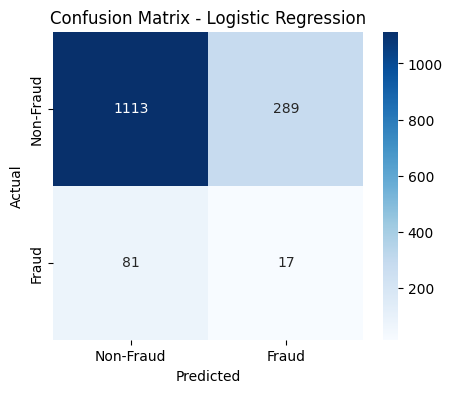

In [188]:
cm = confusion_matrix(y_test,y_pred)
# Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

Still for Fraud transactions:
- high number of False Negative is there that means model is not able to detect a big number of fraud

# Let's try Class Weight method

In [189]:
model = LogisticRegression(class_weight='balanced')

In [190]:
model.fit(X_train, y_train)

/Users/shubham/Desktop/ML_REPO/.venv/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

In [191]:
y_pred = baseline_model.predict(X_test)
accuracy_score(y_test.values,y_pred)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")


Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.79      0.86      1402
           1       0.06      0.17      0.08        98

    accuracy                           0.75      1500
   macro avg       0.49      0.48      0.47      1500
weighted avg       0.87      0.75      0.81      1500

ROC-AUC Score: 0.4975


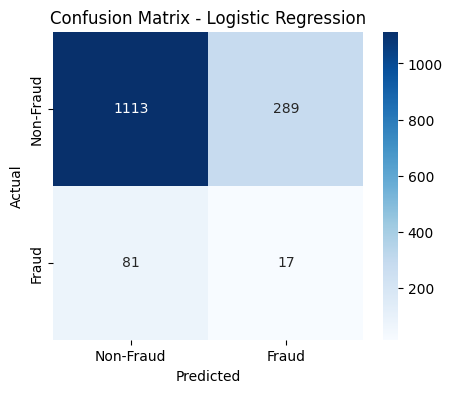

In [192]:
cm = confusion_matrix(y_test,y_pred)
# Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

The output is identical 
- Receiver Operating Characteristic(ROC) - AUC is < 50 for each case that means the model is not able to identify both classes

# Random Forrest 

In [193]:
# Model
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [194]:
y_pred = rf.predict(X_test)



In [195]:
y_prob = rf.predict_proba(X_test)[:,1]
y_prob

array([0.04666667, 0.05666667, 0.07      , ..., 0.04      , 0.10666667,
       0.08      ], shape=(1500,))

In [196]:
y_pred = (y_prob > 0.3).astype(int) # to handle threshold manually 
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97      1402
           1       0.00      0.00      0.00        98

    accuracy                           0.93      1500
   macro avg       0.47      0.50      0.48      1500
weighted avg       0.87      0.93      0.90      1500

ROC-AUC: 0.4935733209118169


/Users/shubham/Desktop/ML_REPO/.venv/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/shubham/Desktop/ML_REPO/.venv/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/shubham/Desktop/ML_REPO/.venv/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{me

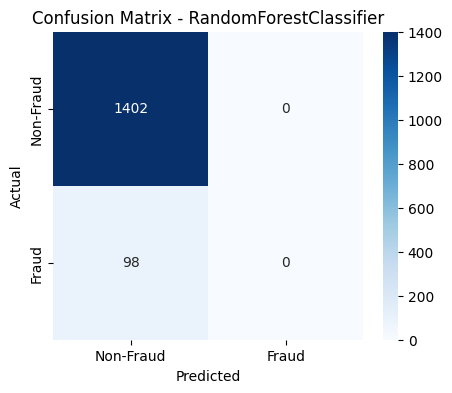

In [197]:
cm = confusion_matrix(y_test,y_pred)
# Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - RandomForestClassifier")
plt.show()

Observations form Random Forrest
- Sill we have lower recall that means model is not able to catch False Non-Frauds (Truley Fraud Tx)
- ROC is ~50% that means the model is not able to classify the Fraud and Non fraud clasess

# try Balanced Random Forrest

In [198]:


brf = BalancedRandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

brf.fit(X_train, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [199]:
y_prob = brf.predict_proba(X_test)[:,1]
y_prob

array([0.28666667, 0.33      , 0.4       , ..., 0.44      , 0.39      ,
       0.36      ], shape=(1500,))

In [200]:
y_pred = (y_prob > 0.3).astype(int) # to handle threshold manually 
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.94      0.10      0.18      1402
           1       0.07      0.91      0.12        98

    accuracy                           0.15      1500
   macro avg       0.50      0.51      0.15      1500
weighted avg       0.88      0.15      0.18      1500

ROC-AUC: 0.5098583656001631


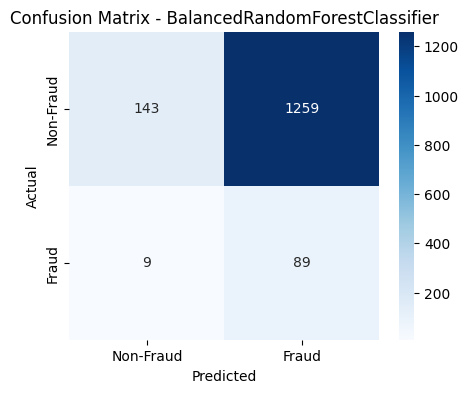

In [201]:
cm = confusion_matrix(y_test,y_pred)
# Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - BalancedRandomForestClassifier")
plt.show()

Outcomes:-
- getting a stable recall values that means low False nagetive flags or Falsely classified as non fraud Model is catching almost all fraud cases
- low precision values means most fraud predictions are wrong
- ROC ~50% still not a stable model

# XGboost

In [202]:
# Compute Class Imbalance Ratio
neg = sum(y_train == 0)
pos = sum(y_train == 1)

scale_pos_weight = neg / pos
print(scale_pos_weight)

14.345268542199488


Why scale_pos_weight Instead of SMOTE?

XGBoost handles imbalance internally using gradient weighting.

In [203]:



xgb = XGBClassifier(
    n_estimators=500,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb.fit(X_train, y_train)

# y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:,1]
threshold = 0.2  # try 0.1, 0.2, 0.3

y_pred = (y_prob >= threshold).astype(int)


print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

/Users/shubham/Desktop/ML_REPO/.venv/lib/python3.14/site-packages/xgboost/training.py:200: UserWarning: [22:36:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.94      0.43      0.59      1402
           1       0.07      0.57      0.12        98

    accuracy                           0.44      1500
   macro avg       0.50      0.50      0.36      1500
weighted avg       0.88      0.44      0.56      1500

ROC-AUC: 0.526157966753035


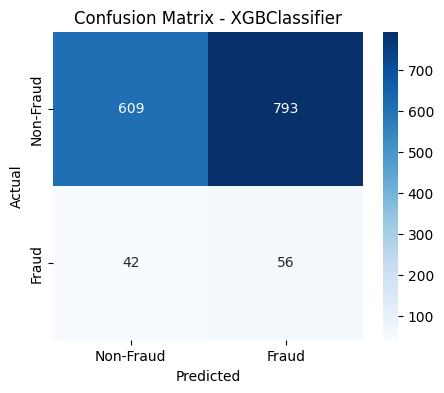

In [204]:
cm = confusion_matrix(y_test,y_pred)
# Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBClassifier")
plt.show()

In [205]:



xgb = XGBClassifier(
    n_estimators=500,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb.fit(X_train_smote, y_train_smote)

# y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:,1]
threshold = 0.3  # try 0.1, 0.2, 0.3

y_pred = (y_prob >= threshold).astype(int)


print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

/Users/shubham/Desktop/ML_REPO/.venv/lib/python3.14/site-packages/xgboost/training.py:200: UserWarning: [22:36:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.94      0.38      0.54      1402
           1       0.07      0.65      0.12        98

    accuracy                           0.40      1500
   macro avg       0.50      0.52      0.33      1500
weighted avg       0.88      0.40      0.51      1500

ROC-AUC: 0.5022198608401991


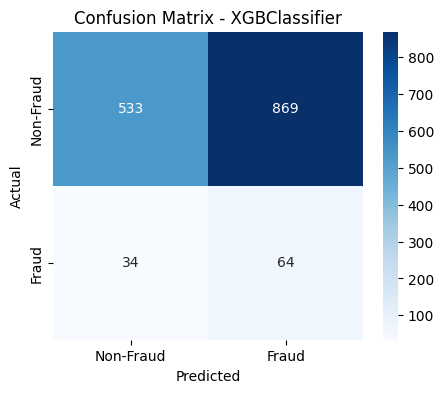

In [206]:
cm = confusion_matrix(y_test,y_pred)
# Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBClassifier")
plt.show()

# Conclusion: 
The model is showing high recall and low precision because it is aggressively predicting the minority class (fraud), leading to many false positives. However, the ROC-AUC around 0.5 indicates poor class separability, likely due to weak feature signal rather than just one-hot encoding dimensionality.